In [1]:
# Data Wrangling II
#     Create an “Academic performance” dataset of students and perform the following operations
#     using Python.
#     1. Scan all variables for missing values and inconsistencies. If there are missing values
#     and/or inconsistencies, use any of the suitable techniques to deal with them.
#     2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
#     techniques to deal with them.
#     3. Apply data transformations on at least one of the variables. The purpose of this
#     transformation should be one of the following reasons: to change the scale for better
#     understanding of the variable, to convert a non-linear relation into a linear one, or to
#     decrease the skewness and convert the distribution into a normal distribution.
#     Reason and document your approach properly.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [3]:
df = pd.read_csv('datasets/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print(df.isnull())
print("\n\n")
print(df.notnull())

     gender  race/ethnicity  parental level of education  lunch  \
0     False           False                        False  False   
1     False           False                        False  False   
2     False           False                        False  False   
3     False           False                        False  False   
4     False           False                        False  False   
..      ...             ...                          ...    ...   
995   False           False                        False  False   
996   False           False                        False  False   
997   False           False                        False  False   
998   False           False                        False  False   
999   False           False                        False  False   

     test preparation course  math score  reading score  writing score  
0                      False       False          False          False  
1                      False       False         

In [5]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [6]:
# Filling missing numerical values with mean
df['math score'].fillna(df['math score'].mean(), inplace=True)
df['reading score'].fillna(df['reading score'].mean(), inplace=True)
df['writing score'].fillna(df['writing score'].mean(), inplace=True)

# Filling missing categorical value with mode
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

C:\Users\onkar\AppData\Local\Temp\ipykernel_24404\1844121810.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math score'].fillna(df['math score'].mean(), inplace=True)
C:\Users\onkar\AppData\Local\Temp\ipykernel_24404\1844121810.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.dropna(inplace=True)

In [9]:
# Simple outlier removal using IQR method
for col in ['math score', 'reading score', 'writing score']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)


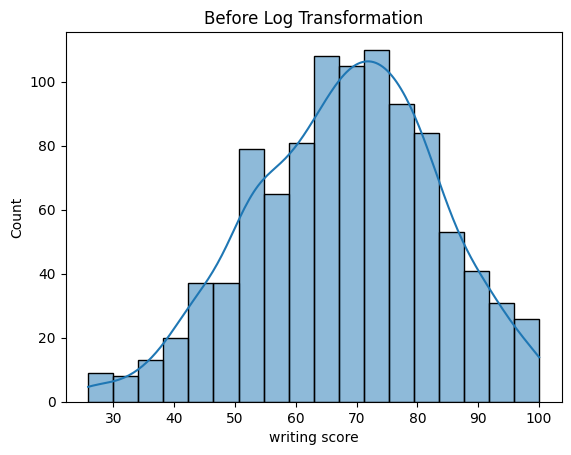

In [10]:
sns.histplot(df['writing score'], kde=True)
plt.title("Before Log Transformation")
plt.show()

In [11]:
df['writing score log'] = np.log1p(df['writing score'])  # log1p = log(x + 1)

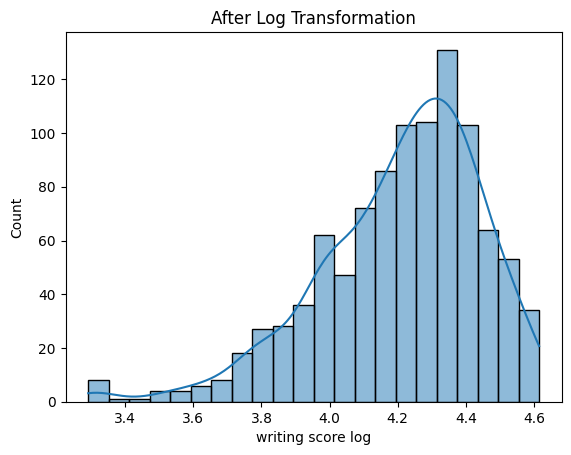

In [12]:
sns.histplot(df['writing score log'], kde=True)
plt.title("After Log Transformation")
plt.show()

<Axes: >

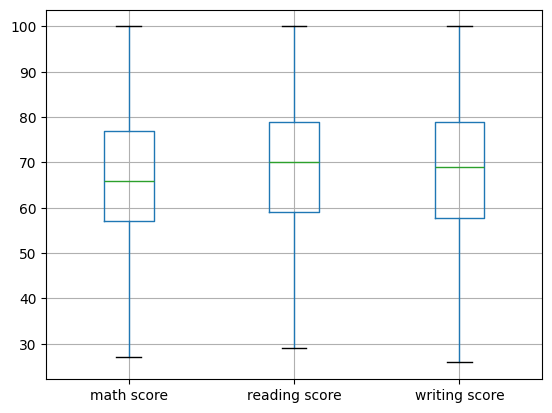

In [13]:
col=['math score','reading score','writing score']
df.boxplot(col)